In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics
import sys
import create_contact_features
import matplotlib.pyplot as plt
import math
from joblib import dump, load
import seaborn as sns
import pandas as pd
from collections import defaultdict
import scipy

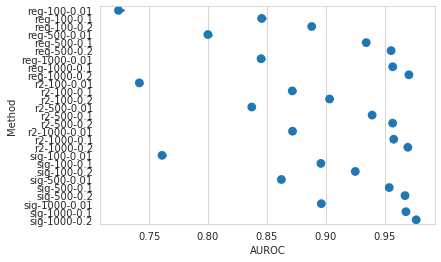

In [4]:
# Plotting per model parameter sweep and diff featurizations - plots not particular informative, table used instead
#output_label, train_acc, test_acc, auroc, pp1, tp, fp, tn, fn, precision, recall, mcc
mode = "rf" # lr, rf, xgboost
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
for fe in ["reg","r2","sig"]:
    f = open("comparison/param_sweep/xgboost/kfold" + fe + "_param.csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = fe + "-" + line_arr[0][2:]
        auroc = float(line_arr[3])
        vals_reg[label].append(auroc)
        data_frame["Method"].append(label)
        data_frame["AUROC"].append(auroc)
    f.close()

sns.set_style("whitegrid")
#plt.figure(figsize=(20,10))
df = pd.DataFrame(data_frame)
ax = sns.pointplot(x='AUROC', y="Method", data=df, join=False)
#plt.xlim([0.97,0.98])
#plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/gb.png", dpi=1000, bbox_inches = "tight")

In [5]:
# Per model parameter sweep and diff featurizations - Create csv files with final average AUROCs with std
# Tables S1, S2, and S3
mode = "lr"
vals_reg = defaultdict(lambda: [])
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
for fe in ["reg","r2","sig"]:
    f = open("comparison/param_sweep/" + mode + "/kfold" + fe + "_param.csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = rename_fe[fe] + "-" + line_arr[0][2:]
        auroc = float(line_arr[3])
        vals_reg[label].append(auroc)
    f.close()
    
print(vals_reg.keys())

f = open("/home/jabella/gitcode/frontiers_2019/plots/" + mode + ".csv", 'w')
if mode == "lr":
    f.write("Feat,Reg,AUROC\n")
    for k in vals_reg.keys():
        feat,reg = k.split("-")
        out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
        f.write(feat + "," + reg + "," + out + "\n")
    f.close()
elif mode == "rf":
    f.write("Feat,Num Trees,Num Feat,AUROC\n")
    for k in vals_reg.keys():
        feat,nt,nf = k.split("-")
        out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
        f.write(feat + "," + nt + "," + nf + "," + out + "\n")
    f.close()
elif mode == "xgboost":
    f.write("Feat,Num Trees,Learning Rate,AUROC\n")
    for k in vals_reg.keys():
        feat,nt,nf = k.split("-")
        out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
        f.write(feat + "," + nt + "," + nf + "," + out + "\n")
    f.close()


dict_keys(['$1/d$-0.1', '$1/d$-1.0', '$1/d$-10.0', '$1/d^{2}$-0.1', '$1/d^{2}$-1.0', '$1/d^{2}$-10.0', 'sig-0.1', 'sig-1.0', 'sig-10.0'])


0.9781315506051996 0.0004668683240001217


(0.87, 1.0)

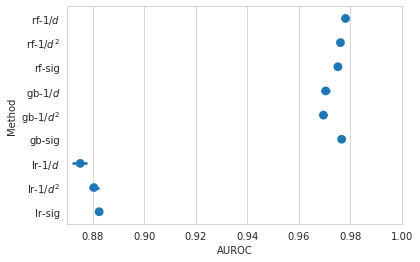

In [6]:
# Plotting sweeping across models and featurizations - plots not informative
# RF: 1000-log2
# xgboost: 1000-0.2
# lr: 1.0
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
rename_mod = {"rf":"rf", "xgboost":"gb", "lr":"lr"}

best_model_vals = []
for mod in ["rf","xgboost","lr"]:
    for fe in ["reg","r2","sig"]:
        f = open("comparison/param_sweep/" + mod + "/kfold" + fe + "_param.csv", 'r')
        for line in f:
            line_arr = line.split(",")
            label = rename_mod[mod] + "-" + rename_fe[fe]
            if line_arr[0][2:] not in ["1000-log2", "1000-0.2", "1.0"]: continue
            auroc = float(line_arr[3])
            if label == "rf-$1/d$": best_model_vals.append(auroc)
            vals_reg[label].append(auroc)
            data_frame["Method"].append(label)
            data_frame["AUROC"].append(auroc)
        f.close()

print(np.mean(best_model_vals), np.std(best_model_vals))
sns.set_style("whitegrid")
#plt.figure(figsize=(20,10))
df = pd.DataFrame(data_frame)
ax = sns.pointplot(x='AUROC', y="Method", data=df, join=False)
plt.xlim([0.87,1.0])
#plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/models.png", dpi=1000, bbox_inches = "tight")

In [7]:
# Sweeping across models and featurizations - Create csv files with final average AUROCs with std
# Table 1
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
rename_mod = {"rf":"rf", "xgboost":"gb", "lr":"lr"}

best_model_vals = []
for mod in ["rf","xgboost","lr"]:
    for fe in ["reg","r2","sig"]:
        f = open("comparison/param_sweep/" + mod + "/kfold" + fe + "_param.csv", 'r')
        for line in f:
            line_arr = line.split(",")
            label = rename_mod[mod] + "-" + rename_fe[fe]
            if line_arr[0][2:] not in ["1000-log2", "1000-0.2", "1.0"]: continue
            auroc = float(line_arr[3])
            if label == "rf-$1/d$": best_model_vals.append(auroc)
            vals_reg[label].append(auroc)
            data_frame["Method"].append(label)
            data_frame["AUROC"].append(auroc)
        f.close()
        
print(vals_reg.keys())

f = open("/home/jabella/gitcode/frontiers_2019/plots/models.csv", 'w')
f.write("Model,Feat,AUROC\n")
for k in vals_reg.keys():
    model,feat = k.split("-")
    out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
    f.write(model + "," + feat + "," + out + "\n")
f.close()


dict_keys(['rf-$1/d$', 'rf-$1/d^{2}$', 'rf-sig', 'gb-$1/d$', 'gb-$1/d^{2}$', 'gb-sig', 'lr-$1/d$', 'lr-$1/d^{2}$', 'lr-sig'])


0.9899903980210831 0.00042683260299482604


(0.97, 1.0)

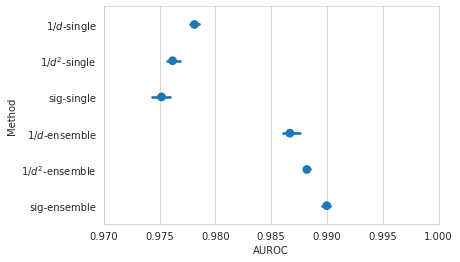

In [8]:
# For the rf model (1000-log2), sweeping across features and single-conf/ensemble - plot not included
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
rename_mod = {"rf":"rf", "xgboost":"gb", "lr":"lr"}


for fe in ["reg","r2","sig"]:
    f = open("comparison/param_sweep/rf/kfold" + fe + "_param.csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = rename_fe[fe] + "-single" # + "-" + line_arr[0][2:]
        if line_arr[0][2:] not in "1000-log2": continue
        auroc = float(line_arr[3])
        vals_reg[label].append(auroc)
        data_frame["Method"].append(label)
        data_frame["AUROC"].append(auroc)
    f.close()

best_model_vals = []
for fe in ["reg","r2","sig"]:
    f = open("comparison/kfold_ensemble" + fe + ".csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = rename_fe[fe] + "-ensemble"
        auroc = float(line_arr[3])
        if label == "sig-ensemble": best_model_vals.append(auroc)
        vals_reg[label].append(auroc)
        data_frame["Method"].append(label)
        data_frame["AUROC"].append(auroc)
    f.close()

print(np.mean(best_model_vals), np.std(best_model_vals))

sns.set_style("whitegrid")
#plt.figure(figsize=(20,10))
df = pd.DataFrame(data_frame)
ax = sns.pointplot(x='AUROC', y="Method", data=df, join=False)
plt.xlim([0.97,1.0])
#plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/ensemble.png", dpi=1000, bbox_inches = "tight")

In [9]:
# For the rf model (1000-log2), sweeping across features and single-conf/ensemble - create csv for paper
# Table 2
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
rename_mod = {"rf":"rf", "xgboost":"gb", "lr":"lr"}


for fe in ["reg","r2","sig"]:
    f = open("comparison/param_sweep/rf/kfold" + fe + "_param.csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = rename_fe[fe] + "-single" # + "-" + line_arr[0][2:]
        if line_arr[0][2:] not in "1000-log2": continue
        auroc = float(line_arr[3])
        vals_reg[label].append(auroc)
        data_frame["Method"].append(label)
        data_frame["AUROC"].append(auroc)
    f.close()

best_model_vals = []
for fe in ["reg","r2","sig"]:
    f = open("comparison/kfold_ensemble" + fe + ".csv", 'r')
    for line in f:
        line_arr = line.split(",")
        label = rename_fe[fe] + "-ensemble"
        auroc = float(line_arr[3])
        if label == "sig-ensemble": best_model_vals.append(auroc)
        vals_reg[label].append(auroc)
        data_frame["Method"].append(label)
        data_frame["AUROC"].append(auroc)
    f.close()
    
print(vals_reg.keys())

f = open("/home/jabella/gitcode/frontiers_2019/plots/ensemble.csv", 'w')
f.write("Feat,Data,AUROC\n")
for k in vals_reg.keys():
    feat,data = k.split("-")
    out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
    f.write(feat + "," + data + "," + out + "\n")
f.close()

dict_keys(['$1/d$-single', '$1/d^{2}$-single', 'sig-single', '$1/d$-ensemble', '$1/d^{2}$-ensemble', 'sig-ensemble'])


In [4]:
# Create table that shows kfold results across models and dataset types
vals_reg = defaultdict(lambda: [])
data_frame = {'Method':[], 'AUROC':[]}
rename_fe = {"reg":"$1/d$", "r2":"$1/d^{2}$","sig":"sig"}
rename_mod = {"rf":"rf", "xgboost":"gb", "lr":"lr"}

f = open("comparison/param_sweep/rf/kfoldsig_param.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "rf-single" # + "-" + line_arr[0][2:]
    if line_arr[0][2:] not in "1000-log2": continue
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()
f = open("comparison/param_sweep/lr/kfoldsig_param.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "lr-single" # + "-" + line_arr[0][2:]
    if line_arr[0][2:] not in "10.0": continue
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()
f = open("comparison/param_sweep/xgboost/kfoldsig_param.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "xg-single" # + "-" + line_arr[0][2:]
    if line_arr[0][2:] not in "1000-0.2": continue
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()



f = open("comparison/kfold_ensemblesig.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "rf-ensemble"
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()
f = open("comparison/kfold_ensemblesig_lr.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "lr-ensemble"
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()
f = open("comparison/kfold_ensemblesig_xg.csv", 'r')
for line in f:
    line_arr = line.split(",")
    label = "xg-ensemble"
    auroc = float(line_arr[3])
    vals_reg[label].append(auroc)
    data_frame["Method"].append(label)
    data_frame["AUROC"].append(auroc)
f.close()

for k in vals_reg.keys():
    print(k, np.mean(vals_reg[k]))
   

f = open("/home/jabella/gitcode/frontiers_2019/plots/kfold_models_data.csv", 'w')
f.write("Feat,Data,AUROC\n")
for k in vals_reg.keys():
    feat,data = k.split("-")
    out = "%.3f (%.3f)" % (np.mean(vals_reg[k]), np.std(vals_reg[k]))
    f.write(feat + "," + data + "," + out + "\n")
f.close()


rf-single 0.9751809323751033
lr-single 0.8824753460408429
xg-single 0.9766269386662498
rf-ensemble 0.9899903980210831
lr-ensemble 0.8952139654445759
xg-ensemble 0.982459456702707


(3, 43)
Median, mean improvement over NetMHCstabpan: 0.017341939541625884 0.119122964744973
Median, mean improvement over NetMHCpan: 0.002909308570814173 0.01307898133739557
NetMHCstabpan 0.9689575850904587 0.8486488178589192
NetMHCpan 0.9885934354561489 0.9546928012664965
sig-ensemble 0.9875 0.9677717826038922


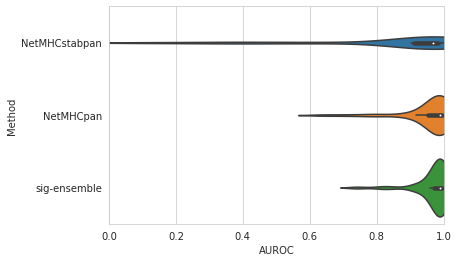

In [2]:
# Figure 2
#output_label, train_acc, test_acc, auroc, pp1, tp, fp, tn, fn, precision, recall, mcc
data_frame = {'Method':[], 'AUROC':[]}

#methods = ["netMHCpan", "netMHCstabpan", "reg", "r2", "sig", "reg_e", "r2_e", "sig_e"]
#locs = ["netMHCpan/netMHCpan.csv", "netMHCstabpan/netMHCstabpan.csv", \
#        "param_sweep/allelereg.csv", "param_sweep/alleler2.csv", "param_sweep/allelesig.csv", \
#        "allele_ensemblereg.csv", "allele_ensembler2.csv", "allele_ensemblesig.csv"]
methods = ["NetMHCstabpan", "NetMHCpan", "sig-ensemble"]
locs = ["comparison/netMHCstabpan.csv", "comparison/netMHCpan.csv", "comparison/allele_ensemblereg.csv"]

vals = []
for i in range(len(methods)):
    
    aurocs = []
    f = open(locs[i], 'r')
    for line in f:
        line_arr= line.split(",")
        auroc = float(line_arr[3])
        aurocs.append(auroc)
        data_frame["Method"].append(methods[i])
        data_frame["AUROC"].append(auroc)
    f.close()
    vals.append(aurocs)
    
vals = np.array(vals)
print(vals.shape)
netMHCstabpan = vals[0]
netMHCpan = vals[1]
structural = vals[-1]
print("Median, mean improvement over NetMHCstabpan:", np.median(structural-netMHCstabpan), np.mean(structural-netMHCstabpan))
print("Median, mean improvement over NetMHCpan:", np.median(structural-netMHCpan), np.mean(structural-netMHCpan))
    
sns.set_style("whitegrid")
df = pd.DataFrame(data_frame)
ax = sns.violinplot(x='AUROC', y="Method", data=df)
#ax = sns.swarmplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x="Method", y="AUROC", data=df,
#        showcaps=False,boxprops={'facecolor':'None'},
#        showfliers=False,whiskerprops={'linewidth':0})

plt.xlabel("AUROC")
plt.xlim([0.0, 1.0])
#plt.show()
#plt.savefig("/home/jabella/Downloads/auroc.eps", dpi=1000, bbox_inches = "tight")
#plt.savefig("/home/jabella/Downloads/auroc.png", dpi=1000, bbox_inches = "tight")

for i in range(3): print(methods[i], np.median(vals[i]), np.mean(vals[i]))
    
#plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/comp.png", dpi=1000, bbox_inches = "tight")

(6, 43)
Median, mean improvement over NetMHCstabpan: 0.017167950850890734 0.11569923208112232
Median, mean improvement over NetMHCpan: -0.001740476348291553 0.009655248673544874
Median, mean improvement over NetMHC: -0.0015519615643224682 0.018444297424857998
Median, mean improvement over mhcflurry: -0.002807685522460024 0.010122797112920549
Median, mean improvement over mixmhcpred: -0.0034842648631886464 -0.012724541066982743
NetMHCstabpan 0.9689575850904587 0.8486488178589192
NetMHCpan 0.9885934354561489 0.9546928012664965
NetMHC 0.9834890413050991 0.858942319327848
MHCFlurry 0.9864537441899551 0.954225252827121
MixMHCPred 0.9931893998858285 0.9770725910070244
sig-ensemble 0.9849281895305501 0.9643480499400415


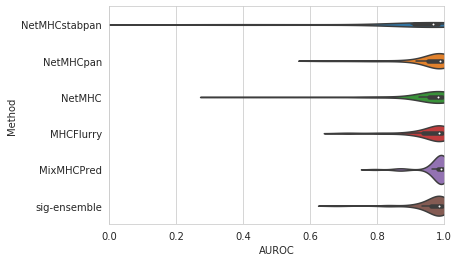

In [8]:
# New fig
# Figure 2
#output_label, train_acc, test_acc, auroc, pp1, tp, fp, tn, fn, precision, recall, mcc
data_frame = {'Method':[], 'AUROC':[]}

#methods = ["netMHCpan", "netMHCstabpan", "reg", "r2", "sig", "reg_e", "r2_e", "sig_e"]
#locs = ["netMHCpan/netMHCpan.csv", "netMHCstabpan/netMHCstabpan.csv", \
#        "param_sweep/allelereg.csv", "param_sweep/alleler2.csv", "param_sweep/allelesig.csv", \
#        "allele_ensemblereg.csv", "allele_ensembler2.csv", "allele_ensemblesig.csv"]
methods = ["NetMHCstabpan", "NetMHCpan", "NetMHC", "MHCFlurry", "MixMHCPred", "sig-ensemble"]
locs = ["comparison/netMHCstabpan.csv", "comparison/netMHCpan.csv", "comparison/netmhc.csv", "comparison/mhcflurry.csv", "comparison/mixmhcpred.csv", "comparison/allele_ensemblesig.csv"]

vals = []
for i in range(len(methods)):
    
    aurocs = []
    f = open(locs[i], 'r')
    for line in f:
        line_arr= line.split(",")
        if methods[i] == "NetMHC" and len(line_arr) < 3: auroc = -1
        else: auroc = float(line_arr[3])
        aurocs.append(auroc)
        
        if auroc > 0: 
            data_frame["Method"].append(methods[i])
            data_frame["AUROC"].append(auroc)
    f.close()
    vals.append(aurocs)
    
vals = np.array(vals)
print(vals.shape)
netMHCstabpan = vals[0] # 1.0
netMHCpan = vals[1] # 4.0
netMHC = vals[2] # 4.0
mhcflurry = vals[3] # 1.4.3
mixmhcpred = vals[4] # 2.0.2
structural = vals[-1]
print("Median, mean improvement over NetMHCstabpan:", np.median(structural-netMHCstabpan), np.mean(structural-netMHCstabpan))
print("Median, mean improvement over NetMHCpan:", np.median(structural-netMHCpan), np.mean(structural-netMHCpan))

diff_netmhc = [structural[i] - netMHC[i] for i in range(len(structural)) if netMHC[i] > 0]
print("Median, mean improvement over NetMHC:", np.median(diff_netmhc), np.mean(diff_netmhc))
print("Median, mean improvement over mhcflurry:", np.median(structural-mhcflurry), np.mean(structural-mhcflurry))
print("Median, mean improvement over mixmhcpred:", np.median(structural-mixmhcpred), np.mean(structural-mixmhcpred))
    
sns.set_style("whitegrid")
df = pd.DataFrame(data_frame)
ax = sns.violinplot(x='AUROC', y="Method", data=df)
#ax = sns.swarmplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x="Method", y="AUROC", data=df,
#        showcaps=False,boxprops={'facecolor':'None'},
#        showfliers=False,whiskerprops={'linewidth':0})

plt.xlabel("AUROC")
plt.xlim([0.0, 1.0])
#plt.show()
#plt.savefig("/home/jabella/Downloads/auroc.eps", dpi=1000, bbox_inches = "tight")
#plt.savefig("/home/jabella/Downloads/auroc.png", dpi=1000, bbox_inches = "tight")

for i in range(len(vals)): print(methods[i], np.median(vals[i]), np.mean(vals[i]))
    
plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/comp_new.png", dpi=1000, bbox_inches = "tight")

(6, 43)
lr-single 0.802704536989372 0.7904092235811653
lr-ensemble 0.8471668933867621 0.824220619425706
rf-single 0.9214026602176542 0.9095125340428474
rf-ensemble 0.9849281895305501 0.9643480499400415
xg-single 0.9202859069298182 0.9075114261639441
xg-ensemble 0.9392540858138156 0.9072842194944669


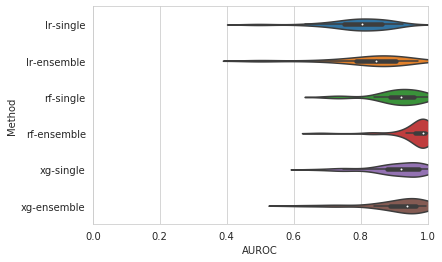

In [9]:
# Plot all allele tests: across models and data types
#output_label, train_acc, test_acc, auroc, pp1, tp, fp, tn, fn, precision, recall, mcc
data_frame = {'Method':[], 'AUROC':[]}

#methods = ["netMHCpan", "netMHCstabpan", "reg", "r2", "sig", "reg_e", "r2_e", "sig_e"]
#locs = ["netMHCpan/netMHCpan.csv", "netMHCstabpan/netMHCstabpan.csv", \
#        "param_sweep/allelereg.csv", "param_sweep/alleler2.csv", "param_sweep/allelesig.csv", \
#        "allele_ensemblereg.csv", "allele_ensembler2.csv", "allele_ensemblesig.csv"]
methods = ["lr-single", "lr-ensemble", "rf-single", "rf-ensemble", "xg-single", "xg-ensemble"]
locs = ["allelesig_lr.csv","allele_ensemblesig_lr.csv","allelesig.csv","allele_ensemblesig.csv","allelesig_xg.csv","allele_ensemblesig_xg.csv"]

vals = []
for i in range(len(methods)):
    
    aurocs = []
    f = open("comparison/" + locs[i], 'r')
    for line in f:
        line_arr= line.split(",")
        if methods[i] == "NetMHC" and len(line_arr) < 3: auroc = -1
        else: auroc = float(line_arr[3])
        aurocs.append(auroc)
        
        if auroc > 0: 
            data_frame["Method"].append(methods[i])
            data_frame["AUROC"].append(auroc)
    f.close()
    vals.append(aurocs)
    
vals = np.array(vals)
print(vals.shape)
lr_single = vals[0] 
lr_ensemble = vals[1] 
rf_single = vals[2] 
rf_ensemble = vals[3]
xg_single = vals[4] 
xg_ensemble = vals[5]
    
sns.set_style("whitegrid")
df = pd.DataFrame(data_frame)
ax = sns.violinplot(x='AUROC', y="Method", data=df)
#ax = sns.swarmplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x="Method", y="AUROC", data=df,
#        showcaps=False,boxprops={'facecolor':'None'},
#        showfliers=False,whiskerprops={'linewidth':0})

plt.xlabel("AUROC")
plt.xlim([0.0, 1.0])
#plt.show()
#plt.savefig("/home/jabella/Downloads/auroc.eps", dpi=1000, bbox_inches = "tight")
#plt.savefig("/home/jabella/Downloads/auroc.png", dpi=1000, bbox_inches = "tight")

for i in range(len(vals)): print(methods[i], np.median(vals[i]), np.mean(vals[i]))
    
plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/comp_structural_methods.png", dpi=1000, bbox_inches = "tight")

All: 18.0 2825185
Binders: 19.0
Nonbinders: 14.0


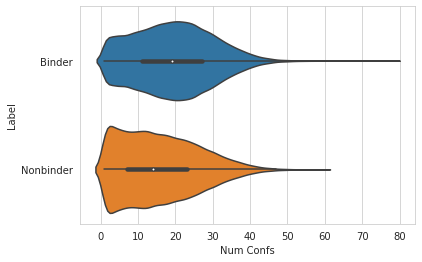

In [31]:
# Figure S1
stats = defaultdict(lambda: -1)
f = open("comparison/ensemble_stats.txt", 'r')
for line in f:
	phla, n = line.split()
	stats[phla] = int(n)
f.close()

data_frame = {'Label':[], 'Num Confs':[]}

binders = []
nonbinders = []
f = open("comparison/modeled_pHLAs.txt", 'r')
for line in f:
    allele, peptide, label = line.split()
    phla = allele + "-" + peptide
    label = int(label)
    if stats[phla] == -1: 
        #print(phla)
        continue
    if label == 1: 
        data_frame["Label"].append("Binder")
        data_frame["Num Confs"].append(stats[phla])
        binders.append(stats[phla])
    elif label == 0: 
        data_frame["Label"].append("Nonbinder")
        data_frame["Num Confs"].append(stats[phla])
        nonbinders.append(stats[phla])
f.close()

print("All:", np.median(data_frame["Num Confs"]), np.sum(data_frame["Num Confs"]))
print("Binders:", np.median(binders))
print("Nonbinders:", np.median(nonbinders))

sns.set_style("whitegrid")
df = pd.DataFrame(data_frame)
ax = sns.violinplot(x='Num Confs', y="Label", data=df)
#ax = sns.swarmplot(x='Method', y="AUROC", data=df)
#ax = sns.boxplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x="Method", y="AUROC", data=df,
#        showcaps=False,boxprops={'facecolor':'None'},
#        showfliers=False,whiskerprops={'linewidth':0})

plt.xlabel("Num Confs")

plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/ensemble_dist.png", dpi=1000, bbox_inches = "tight")

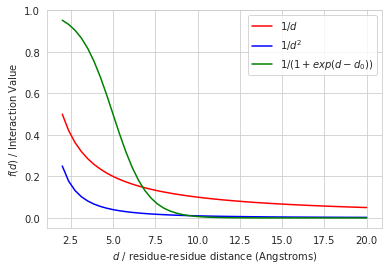

In [29]:
# Figure S2
ds = np.linspace(2,20,49)
plt.plot(ds, 1/ds, c='r')
plt.plot(ds, 1/ds**2, c='b')
#alph = np.log(99)+4
alph = 5
sig = 1/(1+np.exp(ds-alph))
plt.plot(ds, sig, c='g')
#for i in range(len(ds)): print(ds[i], sig[i])

plt.xlabel("$d$ / residue-residue distance (Angstroms)")
plt.ylabel("$f(d)$ / Interaction Value")
plt.legend(("$1/d$","$1/d^{2}$","$1/(1+exp(d-d_0))$"))
plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/func_feat.png", dpi=1000, bbox_inches = "tight")

LEU-LEU 0.01134668405538934
GLU-SER 0.011264853460973705
CYS-TRP 0.010275358833206362
MET-PRO 0.009434840577643006
LEU-PHE 0.009334281465284805
LEU-VAL 0.009099134583551513
ARG-ASP 0.009004466284571112
ASP-LYS 0.008172842387981629
LEU-SER 0.00793736927797863
GLU-LEU 0.007727603877251292
TRP-TYR 0.007703445883157993
ARG-GLU 0.007290113217791825
GLU-LYS 0.007080885235049366
ALA-TYR 0.007008048952006419
GLY-TRP 0.006914695073290716
GLU-THR 0.006826754897555543
PRO-TYR 0.006802472271662055
SER-TYR 0.006778096676264281
ARG-CYS 0.00669480891926546
GLY-LEU 0.00636223971524393
0.0052208878513870126 0.004761904761904762


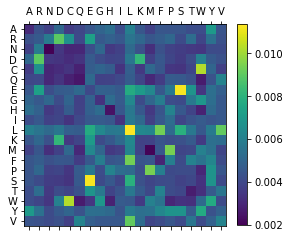

In [26]:
# Figure S3
feature_importances = np.zeros((20,20))
fi_vec = []
f = open("feature_importances.txt", 'r')
for line in f: fi_vec.append(float(line))
f.close()

ind = 0
for i in range(20):
    for j in range(i, 20):
        feature_importances[i,j] = fi_vec[ind]
        feature_importances[j,i] = fi_vec[ind]
        ind += 1

sorted_index = np.argsort(fi_vec)
for i in sorted_index[::-1][:20]:
    print(create_contact_features.new_index_to_interaction[i], fi_vec[i])
    
f = open("/home/jabella/gitcode/frontiers_2019/plots/feature_imp.txt", 'w')
sorted_index = np.argsort(fi_vec)
for i in sorted_index[::-1]:
    f.write(create_contact_features.new_index_to_interaction[i] + " " + str(fi_vec[i]) + "\n")
f.close()
    
hydrophobic_residues = "AVILMFYW"
hp_interactions = []
for i in range(210):
    r1,r2 = create_contact_features.new_index_to_interaction[i].split("-")
    letter1 = create_contact_features.one_letter_code[r1]
    letter2 = create_contact_features.one_letter_code[r2]
    if letter1 in hydrophobic_residues and letter2 in hydrophobic_residues: hp_interactions.append(fi_vec[i])
print(np.mean(hp_interactions), np.mean(fi_vec)) 
        
residue_one_letter = [create_contact_features.one_letter_code[k] for k in create_contact_features.residue_names]

plt.matshow(feature_importances)
#sns.heatmap(feature_importances)
plt.colorbar(fraction=0.045)

vals = np.arange(20)
plt.xticks(vals, residue_one_letter)
plt.yticks(vals, residue_one_letter)

plt.xlim([-0.5, 19.5])
plt.ylim([19.5, -0.5])

plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/feature_imp.png", dpi=1000, bbox_inches = "tight")

# Other not used

(4, 43)
Median, mean improvement over NetMHCstabpan (single): 0.007939274261366314 0.0922028369631212
Median, mean improvement over NetMHCpan (single): -0.013543156297797676 -0.01384114644445621
Median, mean improvement over NetMHCstabpan: 0.017341939541625884 0.119122964744973
Median, mean improvement over NetMHCpan: 0.002909308570814173 0.01307898133739557
NetMHCstabpan 0.9689575850904587 0.8486488178589192
NetMHCpan 0.9885934354561489 0.9546928012664965
1/d-single 0.9516848152009735 0.9408516548220405
sig-ensemble 0.9875 0.9677717826038922


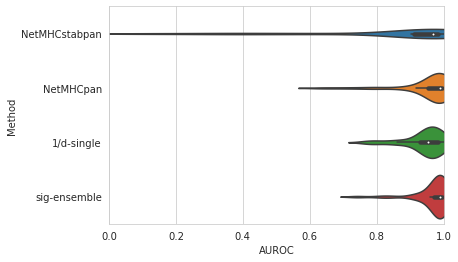

In [23]:
# Plot that includes the single-conf version
#output_label, train_acc, test_acc, auroc, pp1, tp, fp, tn, fn, precision, recall, mcc
data_frame = {'Method':[], 'AUROC':[]}

#methods = ["netMHCpan", "netMHCstabpan", "reg", "r2", "sig", "reg_e", "r2_e", "sig_e"]
#locs = ["netMHCpan/netMHCpan.csv", "netMHCstabpan/netMHCstabpan.csv", \
#        "param_sweep/allelereg.csv", "param_sweep/alleler2.csv", "param_sweep/allelesig.csv", \
#        "allele_ensemblereg.csv", "allele_ensembler2.csv", "allele_ensemblesig.csv"]
methods = ["NetMHCstabpan", "NetMHCpan", "1/d-single", "sig-ensemble"]
locs = ["comparison/netMHCstabpan.csv", "comparison/netMHCpan.csv", "comparison/allelereg.csv", "comparison/allele_ensemblereg.csv"]

vals = []
for i in range(len(methods)):
    
    aurocs = []
    f = open(locs[i], 'r')
    for line in f:
        line_arr= line.split(",")
        auroc = float(line_arr[3])
        aurocs.append(auroc)
        data_frame["Method"].append(methods[i])
        data_frame["AUROC"].append(auroc)
    f.close()
    vals.append(aurocs)
    
vals = np.array(vals)
print(vals.shape)
netMHCstabpan = vals[0]
netMHCpan = vals[1]
structural_single = vals[2]
structural = vals[3]
print("Median, mean improvement over NetMHCstabpan (single):", np.median(structural_single-netMHCstabpan), np.mean(structural_single-netMHCstabpan))
print("Median, mean improvement over NetMHCpan (single):", np.median(structural_single-netMHCpan), np.mean(structural_single-netMHCpan))
print("Median, mean improvement over NetMHCstabpan:", np.median(structural-netMHCstabpan), np.mean(structural-netMHCstabpan))
print("Median, mean improvement over NetMHCpan:", np.median(structural-netMHCpan), np.mean(structural-netMHCpan))

sns.set_style("whitegrid")
df = pd.DataFrame(data_frame)
ax = sns.violinplot(x='AUROC', y="Method", data=df)
#ax = sns.swarmplot(x='Method', y="AUROC", data=df)
#ax = sns.boxplot(x='AUROC', y="Method", data=df)
#ax = sns.boxplot(x="Method", y="AUROC", data=df,
#        showcaps=False,boxprops={'facecolor':'None'},
#        showfliers=False,whiskerprops={'linewidth':0})

plt.xlabel("AUROC")
plt.xlim([0.0, 1.0])
#plt.show()
#plt.savefig("/home/jabella/Downloads/auroc.eps", dpi=1000, bbox_inches = "tight")
#plt.savefig("/home/jabella/Downloads/auroc.png", dpi=1000, bbox_inches = "tight")

for i in range(4): print(methods[i], np.median(vals[i]), np.mean(vals[i]))
    
#plt.savefig("/home/jabella/Downloads/withregsingle.png", dpi=1000, bbox_inches = "tight")

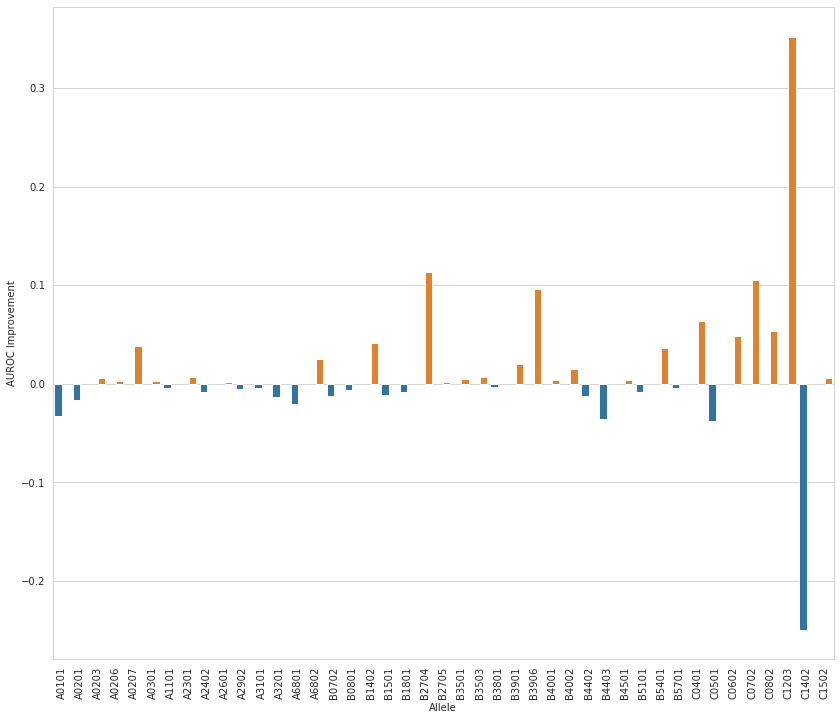

In [26]:
#alleles_list = list(set(alleles))
#alleles_list.sort()
diff = np.array(structural - netMHCpan)
data_frame = {'Allele':[], 'AUROC Improvement':[], 'IsPos':[]}
alleles_with_pos_and_neg = []
f = open("comparison/alleles_with_pos_and_neg.txt", 'r')
for line in f: alleles_with_pos_and_neg.append(line.rstrip())
f.close()
for i in range(len(alleles_with_pos_and_neg)):
    data_frame['Allele'].append(alleles_with_pos_and_neg[i])
    data_frame['AUROC Improvement'].append(diff[i])
    data_frame['IsPos'].append(diff[i] > 0)

df = pd.DataFrame(data_frame)
fig = plt.figure(figsize=(14,12))
ax = sns.barplot(x="Allele", y="AUROC Improvement", data=df, hue="IsPos")
plt.xticks(rotation=90)
ax.get_legend().set_visible(False)
plt.savefig("/home/jabella/gitcode/frontiers_2019/plots/improvement_across_allele_pan.png", dpi=200, bbox_inches = "tight")